# Imports

In [1]:
import numpy as np
import scipy.io 
import pandas as  pd

In [14]:
import time

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

# DB

In [3]:
workingDir = 'C:/Cerebral/_MarioSandBox/DB/medicalHolography/vascular/Example/'
dataName = 'VTD_ready_for_ROI_choice.mat'
maskName = 'mask.mat'

In [4]:
def readData(fileLocationAndName,VariableName):
    data = scipy.io.loadmat(fileLocationAndName)
    data = data[VariableName]
    dataArray = np.array(data)
    return dataArray

In [5]:
data = readData(workingDir+dataName,'VTD_ready')
data.shape

(360L, 766L, 760L)

In [6]:
mask = readData(workingDir+maskName,'mask')
mask.shape

(760L, 766L)

# Data visualization
- [Movie like](https://www.datacamp.com/community/tutorials/matplotlib-3d-volumetric-data)

<IPython.core.display.Javascript object>


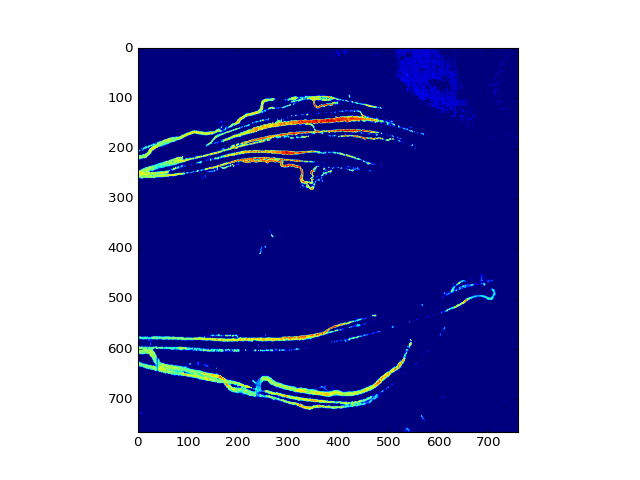

In [13]:
plt.figure(1)
plt.imshow(data[10,:,:])

This maybe side ways ... so let us manipulate the data some more.

<IPython.core.display.Javascript object>


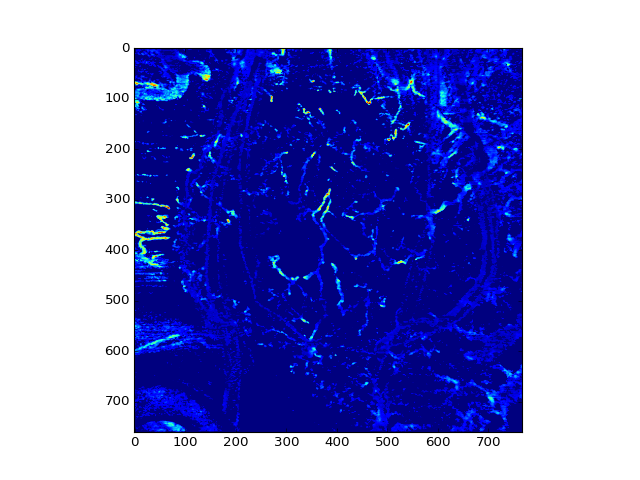

In [70]:
plt.figure(2)
plt.imshow(data[110,:,:].T)

This looks promising

In [17]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

In [35]:
def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = 0
    ax.imshow(volume[ax.index,:,:].T)
    plt.title('Slice: %d'%ax.index)
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index,:,:].T)
    plt.title('Slice: %d'%ax.index)
    
def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index,:,:].T)
    plt.title('Slice: %d'%ax.index)

<IPython.core.display.Javascript object>


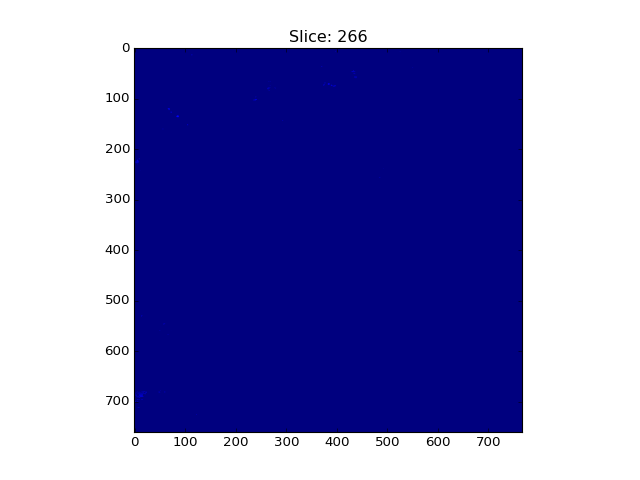

In [36]:
multi_slice_viewer(data)

<IPython.core.display.Javascript object>


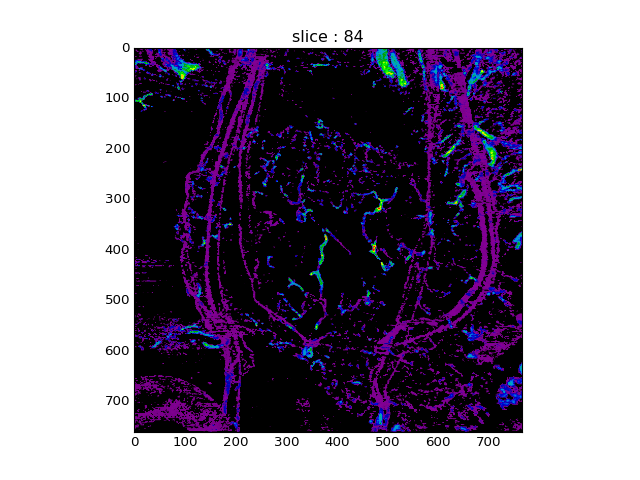

In [ ]:
fig = plt.figure()

for k in range(200):
    plt.clf()
    plt.imshow(data[k,:,:].T,cmap=plt.cm.spectral)    
    #plt.imshow(data[k+3,:,:].T)    
    plt.title('slice : %d'%(k+3))
    fig.canvas.draw()    
    

In [63]:
import imageio

In [64]:
imageStack = []
for k in range(200):
    imageStack.append(data[k,:,:].T)     

In [65]:
imageio.mimsave(workingDir + 'movie.gif', imageStack)